# Text to Text Explanation: Open Ended Text Generation Using GPT2

This notebook demonstrates how to get explanations for the output of gpt2 used for open ended text generation. In this demo, we use the pretrained gpt2 model provided by hugging face (https://huggingface.co/gpt2) to explain the generated text by gpt2. We further showcase how to get explanations for custom output generated text and plot global input token importances for any output generated token.

In [6]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
import shap
import torch

### Load model and tokenizer

In [7]:
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
model =  AutoModelForCausalLM.from_pretrained("gpt2").cuda()

Below, we set certain model configurations. We need to define if the model is a decoder or encoder-decoder.
This can be set through the 'is_decoder' or 'is_encoder_decoder' param in model's config file.
We can also set custom model generation parameters which will be used during the output text generation decoding process.

In [8]:
# set model decoder to true
model.config.is_decoder=True
# set text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "no_repeat_ngram_size": 2
  }

### Define initial text

In [9]:
s = ['I enjoy walking with my cute dog']

In [5]:
tokenizer(s)

{'input_ids': [[40, 2883, 6155, 351, 616, 13779, 3290]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1]]}

### Create an explainer object

In [17]:
from IPython.core.debugger import set_trace 

In [ ]:
set_trace()
explainer = shap.Explainer(model,tokenizer)

--Return--
None
> <ipython-input-18-3a920560c466>(1)<module>()
----> 1 set_trace()
      2 explainer = shap.Explainer(model,tokenizer)

ipdb> b 2
Breakpoint 7 at <ipython-input-18-3a920560c466>:2
ipdb> c
None
> <ipython-input-18-3a920560c466>(2)<module>()
      1 set_trace()
7---> 2 explainer = shap.Explainer(model,tokenizer)

ipdb> s
--Call--
> /ext3/miniconda3/lib/python3.8/site-packages/shap/explainers/_explainer.py(26)__init__()
     24     """
     25 
---> 26     def __init__(self, model, masker=None, link=links.identity, algorithm="auto", output_names=None, feature_names=None, **kwargs):
     27         """ Build a new explainer for the passed model.
     28 

ipdb> b 179
Breakpoint 8 at /ext3/miniconda3/lib/python3.8/site-packages/shap/explainers/_explainer.py:179
ipdb> c
> /ext3/miniconda3/lib/python3.8/site-packages/shap/explainers/_explainer.py(179)__init__()
    177             elif algorithm == "partition":
    178                 self.__class__ = explainers.Partition
8-> 

### Compute shap values

In [6]:
shap_values = explainer(s)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


### Visualize shap explanations

In [7]:
shap.plots.text(shap_values)

### Another example...

In [8]:
s=['Scientists confirmed the worst possible outcome: the massive asteroid will collide with Earth']

In [9]:
explainer = shap.Explainer(model,tokenizer)

explainers.Partition is still in an alpha state, so use with caution...


In [10]:
shap_values = explainer(s)

Setting `pad_token_id` to 50256 (first `eos_token_id`) to generate sequence


In [11]:
shap.plots.text(shap_values)

##  Custom text generation and debugging biased outputs

Below we demonstrate the process of how to explain the liklihood of generating a particular output sentence given an input sentence using the model. <br><br>
For example, we ask a question:<br>
Which country's inhabitant (target) in the sentence "I know many people who are [<b>target</b>]." would have a high liklilhood of generating the token "vodka" in the output sentence "They love their <b>vodka</b>!" ?
<br><br>
For this, we first define input-output sentence pairs

In [12]:
# define input
x = [
    "I know many people who are Russian.",
    "I know many people who are Greek.",
    "I know many people who are Australian.",
    "I know many people who are American.",
    "I know many people who are Italian.",
    "I know many people who are Spanish.",
    "I know many people who are German.",
    "I know many people who are Indian."
]

In [13]:
# define output
y = [
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!",
    "They love their vodka!"
]

We wrap the model with a Teacher Forcing scoring class and create a Text masker

In [14]:
teacher_forcing_model = shap.models.TeacherForcing(model, tokenizer)
masker = shap.maskers.Text(tokenizer, mask_token = "...", collapse_mask_token=True)

Create an explainer...

In [15]:
explainer = shap.Explainer(teacher_forcing_model,masker)

explainers.Partition is still in an alpha state, so use with caution...


Generate SHAP explanation values!

In [16]:
shap_values = explainer(x, y)

Now that we have generated the SHAP values, we can have a look at the contribution of tokens in the input driving the token "vodka" in the output sentence using the text plot. <br><br>
<b>Note:</b> The red color indicates a positive contribution while the blue color indicates negative contribution and the intensity of the color shows its strength in the respective direction.

In [17]:
shap.plots.text(shap_values)

To view what input tokens impact (positively/negatively) the liklihood of generating the word "vodka", we plot the global token importances the word "vodka". <br><br>

Voila! Russians love their vodka, dont they? :) 

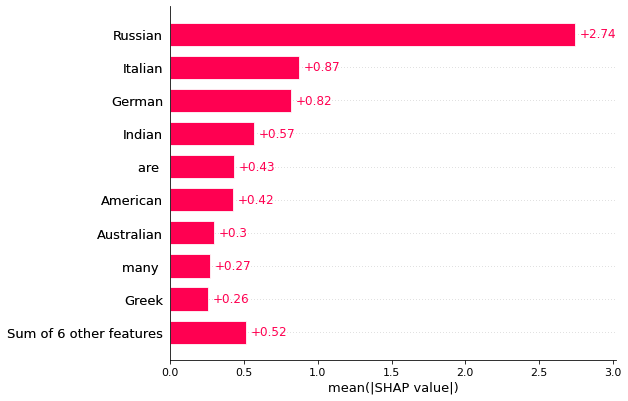

In [18]:
shap.plots.bar(shap_values[...,"vodka"])